In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

data = pd.read_csv('data_london/processed_data/listing_data_clean_final_v2_extra.csv')
data.head(3)

,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_ltm,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_duration_days,listing_duration_days,region,occupancy_rate,crime_rate,hangers,washer,tv,detector,kitchen,heating,essentials,iron,wifi,dryer,min_dist_subway,min_dist_park,min_dist_attraction,recency,rating_class,property_room_type
0,0.8,0.88,0,4.0,1,1,51.56802,-0.11121,1,Apartment,Private room,2,1.0,1.0,0.0,Real Bed,65.0,100.0,15.0,1,15.0,1,29,21,6,0,moderate,0,0,1,2,0,0.18,3831.0,3556.0,Central,0.010959,0.999,1,1,1,1,1,1,1,1,1,1,523.330908,12785.466793,11786.246428,81.0,2,Apartment_Private room
1,1.0,0.86,0,1.0,1,1,51.48796,-0.16898,1,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,100.0,150.0,50.0,2,0.0,10,50,89,4,1,strict_14_with_grace_period,1,1,1,0,0,0.70,3812.0,3796.0,Central,0.298630,1.098,1,1,1,1,1,1,1,1,1,1,728.423310,11869.153805,12392.552363,58.0,2,Apartment_Entire home/apt
2,0.8,0.95,0,18.0,1,1,51.52195,-0.14094,0,Apartment,Entire home/apt,6,2.0,3.0,3.0,Real Bed,300.0,350.0,90.0,3,10.0,3,365,42,2,1,strict_14_with_grace_period,0,0,15,0,0,0.38,3781.0,3340.0,Central,0.095890,1.713,1,1,1,1,1,1,1,1,1,1,302.398372,11059.433984,10904.874110,192.0,2,Apartment_Entire home/apt


In [2]:
# drop irrelevant columns (categorical and binary variables)

data.drop(['latitude','longitude','host_total_listings_count','property_type','room_type',
            'number_of_reviews','reviews_per_month','host_is_superhost','rating_class',
          'property_type','room_type','bed_type','cancellation_policy','region','property_room_type',
          'host_has_profile_pic', 'host_identity_verified','is_location_exact','instant_bookable',
          'require_guest_profile_picture','require_guest_phone_verification','hangers',
           'washer', 'tv','detector','kitchen','heating','essentials','iron','wifi','dryer'], 
                   axis=1, inplace=True)

data.head(3)

,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_duration_days,listing_duration_days,occupancy_rate,crime_rate,min_dist_subway,min_dist_park,min_dist_attraction,recency
0,0.8,0.88,2,1.0,1.0,0.0,65.0,100.0,15.0,1,15.0,1,29,6,1,2,0,3831.0,3556.0,0.010959,0.999,523.330908,12785.466793,11786.246428,81.0
1,1.0,0.86,2,1.0,1.0,1.0,100.0,150.0,50.0,2,0.0,10,50,4,1,0,0,3812.0,3796.0,0.298630,1.098,728.423310,11869.153805,12392.552363,58.0
2,0.8,0.95,6,2.0,3.0,3.0,300.0,350.0,90.0,3,10.0,3,365,2,15,0,0,3781.0,3340.0,0.095890,1.713,302.398372,11059.433984,10904.874110,192.0


In [3]:
data.shape

(57636, 25)

(25.0, 0.0)

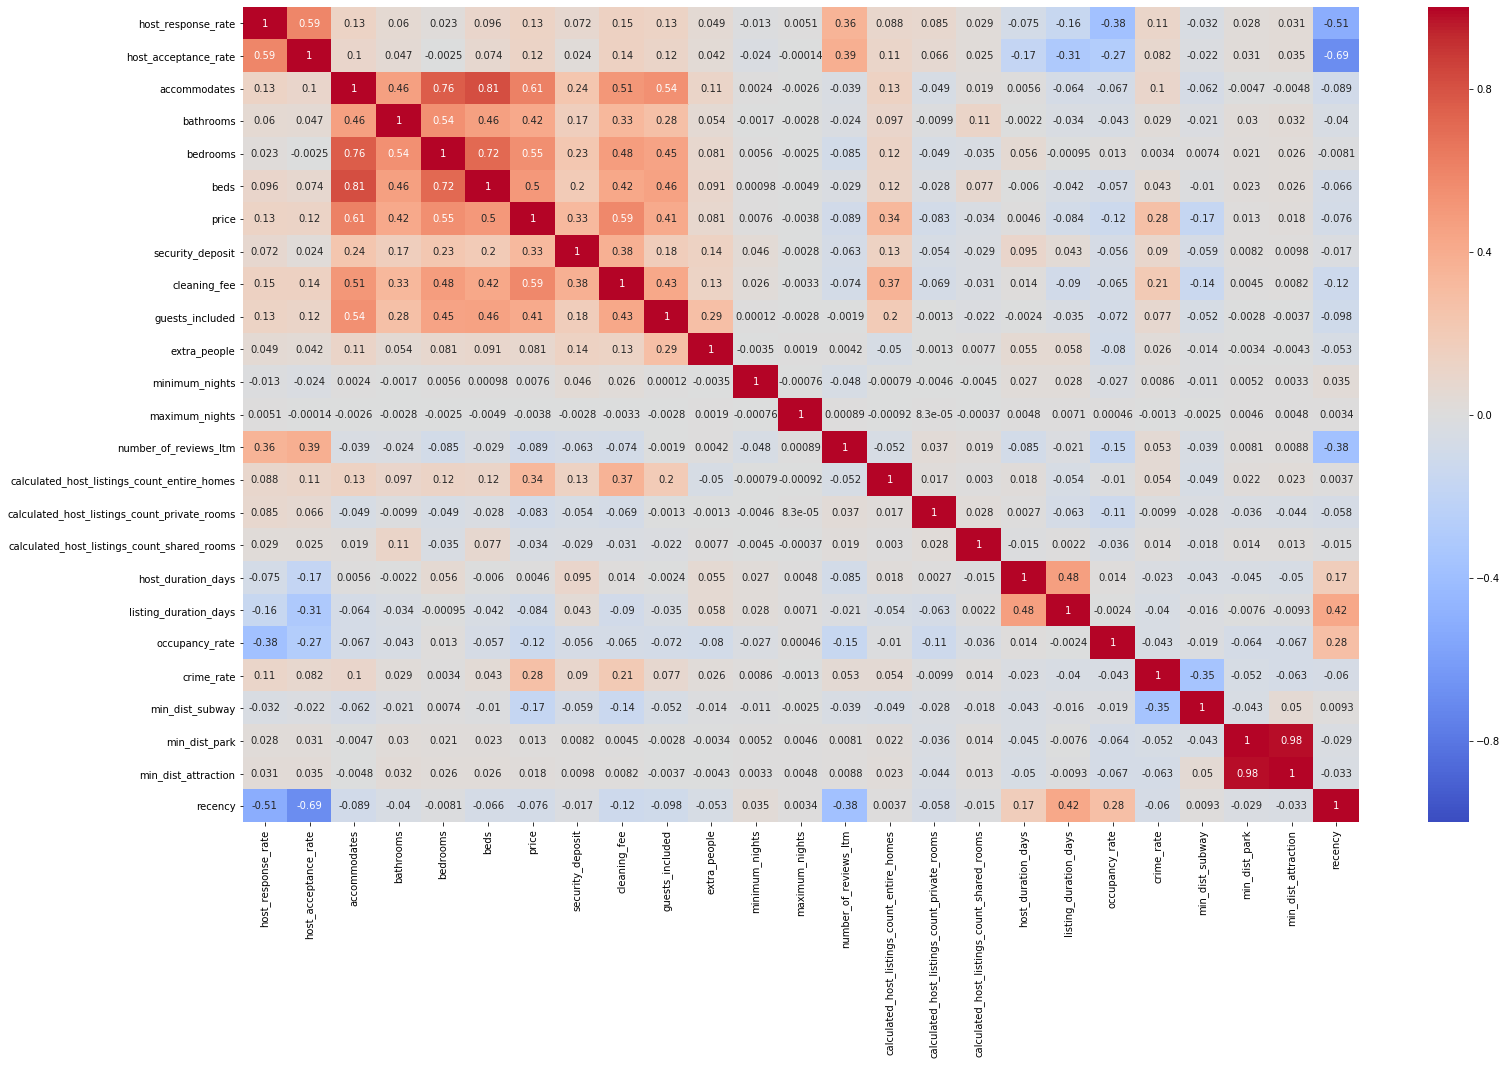

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25,15))

ax = sns.heatmap(data.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)